TypeError: getMomentum() missing 2 required positional arguments: 'img' and 'img_ori'

In [1]:
import cv2 as cv
import skimage as sim

In [2]:
from scipy.ndimage import distance_transform_edt

(0, 100) (0, 100)


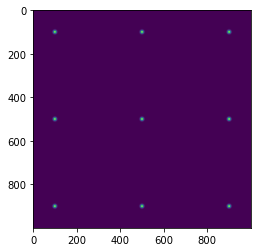

In [3]:
#import cv2
import matplotlib.pyplot as plt
import numpy as np
from simulation import Shak, getRange, gauss, gauss2D
from analyses import getSeperation, getMomentum


x_pos = np.linspace(10,90,3)
y_pos = np.linspace(10,90,3)
X,Y = np.meshgrid(x_pos,y_pos)

# Generate Image 
res = (1000,1000)
im_range_x=(0,100)

img =   Shak(X, Y, res, 
            im_range_x, 
            im_range_x)

img = (255*img/img.max()).astype(np.uint8)

plt.imshow(img)

In [4]:
def getMomentum(img,img_masks):
    
    import multiprocessing.pool as pool
    
    
    x = np.zeros(np.max(img_masks))
    y = np.zeros(np.max(img_masks))
    #disk = morphology.disk(10)
    for i in range(0,np.max(img_masks)+2):
        mask = img_masks == i
        img_copy = img.copy().astype(np.uint8)
        img_copy[mask] = 0 
        M = cv.moments(img_copy)
        #print(M)
        x[i-2] = M["m01"] / M["m00"]
        y[i-2] = M["m10"] / M["m00"]
        
        #x[i-2] = M[0, 1] / M[0, 0]
        #y[i-2] = M[1, 0] / M[0, 0]
        
    return x, y

In [5]:
len(px)

NameError: name 'px' is not defined

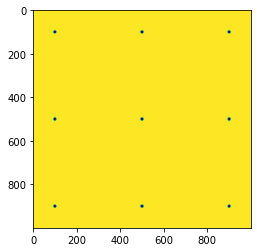

In [7]:
plt.imshow(np.uint8(imgLab==0))

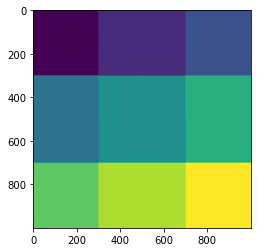

Wall time: 22 ms


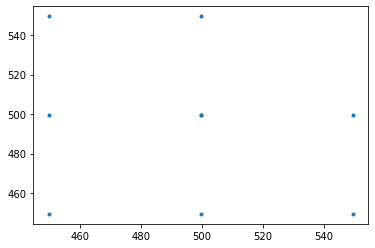

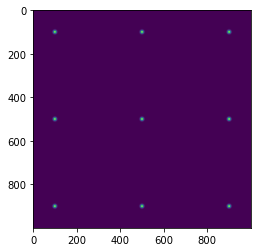

In [6]:
imgLab = img >= 100

d, n = cv.distanceTransformWithLabels(np.uint8(imgLab==0),cv.DIST_L1,3)
plt.imshow(n)
plt.show()
%time px,py = getMomentum(img,n)

#for x,y in zip(px,py):
plt.plot(py,px,".")
plt.show()
plt.imshow(img)

In [ ]:
cv.moments(img*(n == 100))
plt.imshow(img*(n == 9))

In [ ]:
imgLab = img >= 100

# c = plt.imshow(imgLab)
# plt.colorbar(c)
%time d, n = distance_transform_edt(imgLab==0,return_indices=True)
#%time distances = distance_transform_edt(imgLab==0)
c = plt.imshow(d)
plt.colorbar(c)
plt.show()


c = plt.imshow(n[0,:,:])
plt.colorbar(c)
plt.show()

c = plt.imshow(n[1,:,:])
plt.colorbar(c)
plt.show()

In [ ]:
imgLab

In [ ]:
n[0,:,:].ravel()

In [ ]:
plt.plot(nearest_label_coords[1,:])
plt.plot(n[0,:,:].ravel())

In [ ]:
print(t)

In [ ]:
%time cv.distanceTransformWithLabels(np.uint8(imgLab==0),cv.DIST_L1,3)

In [ ]:
#  DIST_L2
%time distances, nearest_label_coords = cv.distanceTransformWithLabels(np.uint8(imgLab==0),cv.DIST_L1,3)
c = plt.imshow(distances)
plt.colorbar(c)
plt.show()


c = plt.imshow(nearest_label_coords)
plt.colorbar(c)
plt.show()
#plt.plot(nearest_label_coords[1,:])
#plt.show()

In [ ]:
plt.imshow((nearest_label_coords == 88)* img)

In [ ]:
plt.imshow(img2)

In [ ]:
p = np.random.rand(5000,5000)
img2 = img
img2[nearest_label_coords != 88] = 0

In [ ]:
%time cv.moments(img2)

In [ ]:
%time cv.moments(p)

In [ ]:
import multiprocessing as mp
from multiprocessing import Process
from multiprocessing import Pool

In [ ]:
import time
def f(i):
    p = np.random.rand(1000,2000)
    np.linalg.pinv(p)
    return 0.1*i

In [ ]:
p = pool.Pool(8)
b = p.map_async(f,np.linspace(0,1,3))

In [ ]:
for i in b.get():
    print(i)

In [ ]:
%time b = map(f,np.linspace(0,1,30))

In [ ]:
def f(i):
    return i**2

p = Pool(5)
p.map(f,[1,2,3])